# **Library Package**

In [ ]:
#Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns

#plotly has been used for visualization
import plotly as py
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rcParams
# Algorithms and models
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
# Metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# **Input Data**

In [ ]:

# 加载数据
#data_path = '/content/drive/MyDrive/546-project/CC GENERAL.csv'
data_path = 'CC GENERAL.csv'
df = pd.read_csv(data_path)

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


1.CUST_ID：信用卡持有人的身份（分类）

2.BALANCE：其帐户中用于购买的余额金额

3.BALANCE_FREQUENCY：余额更新的频率，分数介于 0 和 1 之间（1 = 经常更新，0 = 不经常更新）

4.PURCHASES：从帐户进行的购买金额

5.ONEOFF_PURCHASES：一次性完成的最大购买金额

6.INSTALLMENTS_PURCHASES：分期完成的购买金额

7.CASH_ADVANCE：用户预付的现金

8.PURCHASES_FREQUENCY：进行购买的频率，评分在 0 到 1 之间（1 = 经常购买，0 = 不经常购买）

9.ONEOFFPURCHASESFREQUENCY：一次性购买的频率（1 = 经常购买，0 = 不经常购买）

10.PURCHASESINSTALLMENTSFREQUENCY：分期购买的频率（1 = 经常购买，0 = 不经常进行）

11.CASHADVANCEFREQUENCY : 预付现金的频率

12.CASHADVANCETRX : 使用“预付现金”进行的交易数量

13.PURCHASES_TRX : 进行的购买交易数量

14.CREDIT_LIMIT : 用户信用卡限额

15.PAYMENTS : 用户完成的付款金额

16.MINIMUM_PAYMENTS：用户支付的最低金额

17.PRCFULLPAYMENT：用户支付的全额付款的百分比

18.TENURE：用户信用卡服务的期限

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# **Data Overview**

In [ ]:
#overview

df_overview = []
columns = df . columns . drop("CUST_ID")
for i in columns :
    types = df[i] . dtypes
    unique_data = df[i] . nunique()

    missing_count=df[i].isnull().sum()
    value_count= df[i].isnull().count()
    missing_percentage= round(missing_count/value_count*100,2)

    duplicated= df.duplicated().sum()
    df_overview . append ([i , types , unique_data , missing_count, missing_percentage,duplicated])

df_info = pd . DataFrame (df_overview)
df_info . columns =['name of column' , 'types' ,'unique_data' , 'missing value', "missing percentage","duplicated"]




df_info.style.highlight_max(color = 'aqua', axis = 0)

,name of column,types,unique_data,missing value,missing percentage,duplicated
0,BALANCE,float64,8871,0,0.000000,0
1,BALANCE_FREQUENCY,float64,43,0,0.000000,0
2,PURCHASES,float64,6203,0,0.000000,0
3,ONEOFF_PURCHASES,float64,4014,0,0.000000,0
4,INSTALLMENTS_PURCHASES,float64,4452,0,0.000000,0
5,CASH_ADVANCE,float64,4323,0,0.000000,0
6,PURCHASES_FREQUENCY,float64,47,0,0.000000,0
7,ONEOFF_PURCHASES_FREQUENCY,float64,47,0,0.000000,0
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.000000,0
9,CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000,0


# **Process Data**

In [ ]:
df.drop('CUST_ID', axis=1, inplace = True)
scaler = StandardScaler ()              # scalling the features
scaled_features = scaler.fit_transform (df)

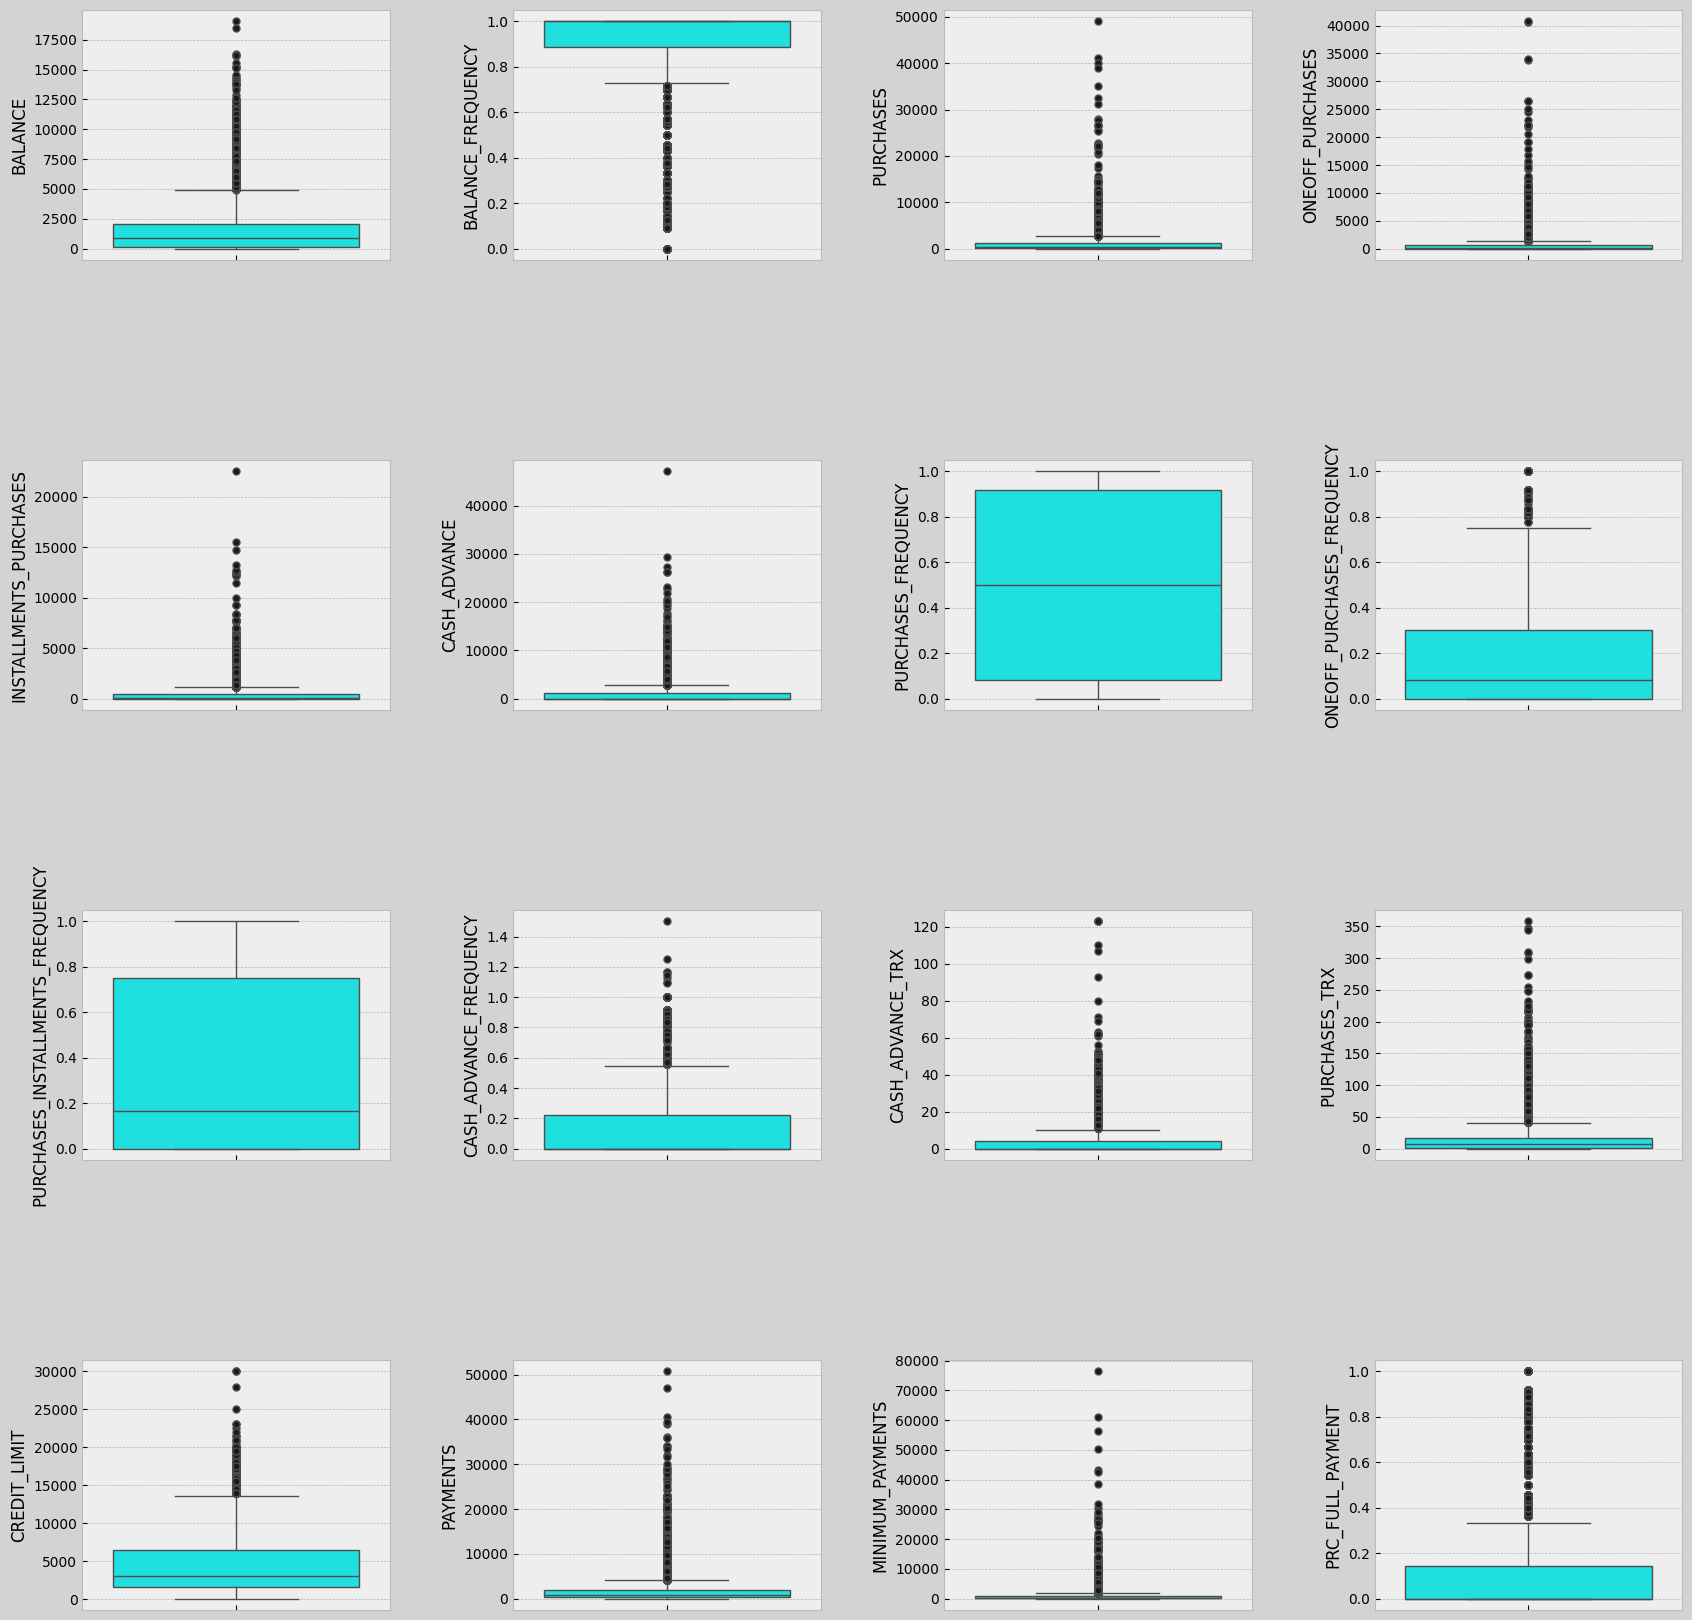

In [ ]:
#Using Box plot

plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i in range (len(df.columns)-1):

    plt.subplot(4,4,i+1)
    sns.boxplot(df[df.columns[i]], color='aqua',flierprops = dict(markerfacecolor = '0.10', markersize = 5))




In [ ]:
#finding outliers base on the Inter Quantile Range(IQR)
# 找到异常值，并统计每列异常值的数量
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

count_out = df[(df <  (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].count()


df_count_out = pd.DataFrame(count_out, columns=['count_out'])
df_count_out


,count_out
BALANCE,695
BALANCE_FREQUENCY,1493
PURCHASES,808
ONEOFF_PURCHASES,1013
INSTALLMENTS_PURCHASES,867
CASH_ADVANCE,1030
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,782
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,525


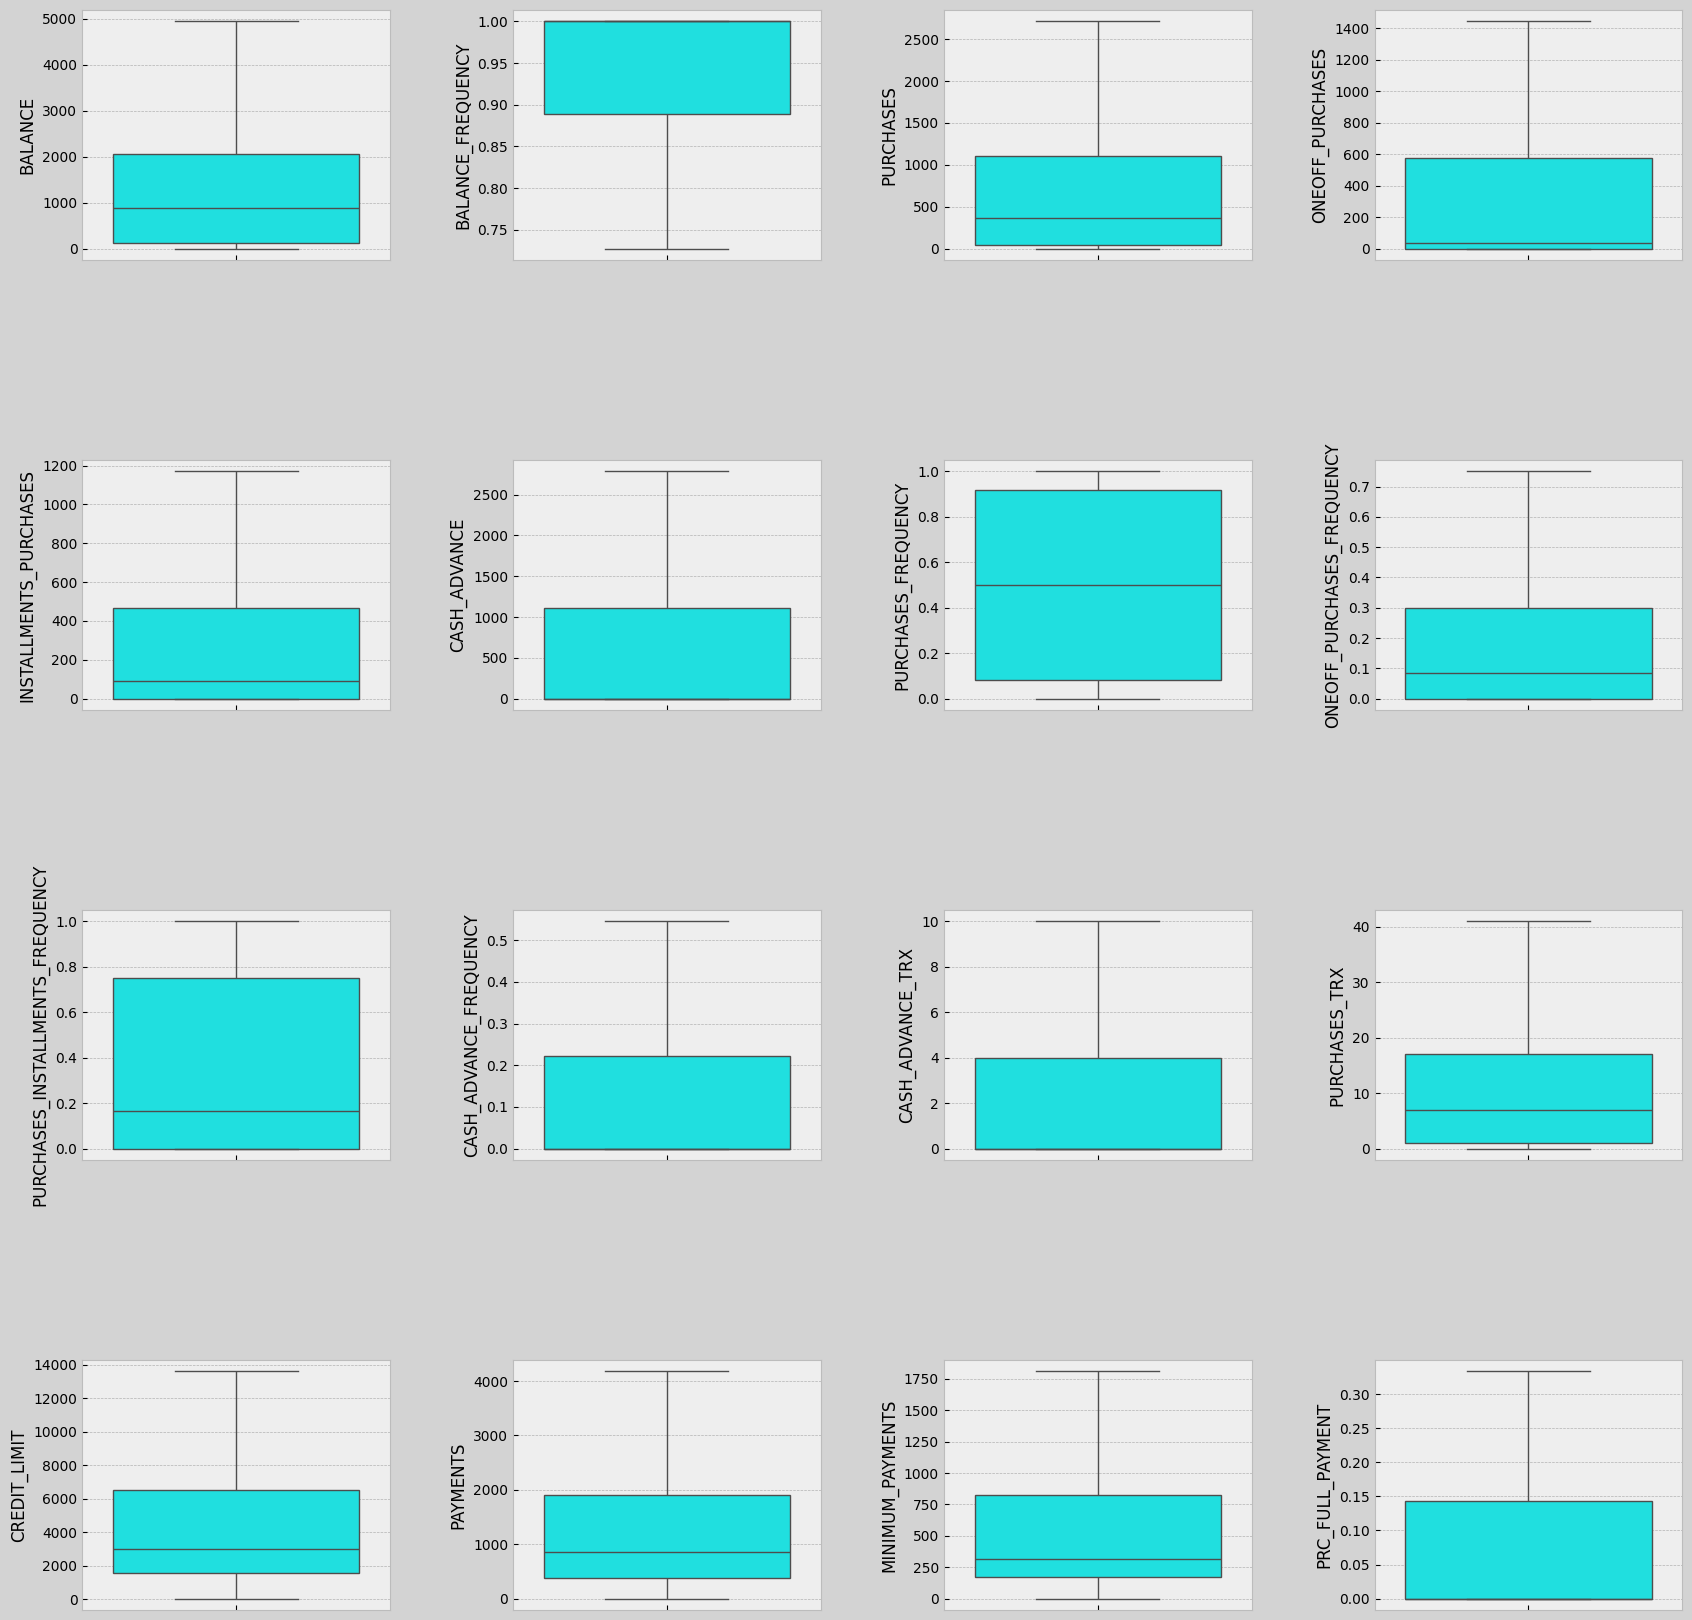

In [ ]:

plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
#showfliers = False 不显示异常值
for i in range (len(df.columns)-1):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[df.columns[i]],showfliers = False ,color='aqua')


In [ ]:
# missing values in 'CREDIT_LIMIT' column(this column has one missing value)
nulls_value = pd.isnull(df["CREDIT_LIMIT"])
df[nulls_value]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [ ]:
df.drop(columns=['PURCHASES_INSTALLMENTS_FREQUENCY',
                      'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY' ], inplace=True)

In [ ]:
df.drop([5203], axis=0, inplace=True)#去除缺失值
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,2,0,500.0,52.549959,55.755628,0.250000,6


# **Data Analysis**

In [ ]:
df.skew()

BALANCE                        2.393270
BALANCE_FREQUENCY             -2.024193
PURCHASES                      8.143969
INSTALLMENTS_PURCHASES         7.298823
CASH_ADVANCE                   5.166323
PURCHASES_FREQUENCY            0.059970
ONEOFF_PURCHASES_FREQUENCY     1.535453
CASH_ADVANCE_TRX               5.720976
PURCHASES_TRX                  4.630493
CREDIT_LIMIT                   1.522464
PAYMENTS                       5.907465
MINIMUM_PAYMENTS              13.622193
PRC_FULL_PAYMENT               1.942641
TENURE                        -2.944788
dtype: float64

In [ ]:
skewness_features = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                     'PAYMENTS', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']
df[skewness_features] = np.log(df[skewness_features] + 0.1)

In [ ]:
df.skew()

BALANCE                      -1.178399
BALANCE_FREQUENCY            -2.024193
PURCHASES                    -0.971036
INSTALLMENTS_PURCHASES       -0.124961
CASH_ADVANCE                  0.185856
PURCHASES_FREQUENCY           0.059970
ONEOFF_PURCHASES_FREQUENCY    1.535453
CASH_ADVANCE_TRX              0.410488
PURCHASES_TRX                -0.582282
CREDIT_LIMIT                 -0.102317
PAYMENTS                     -2.730197
MINIMUM_PAYMENTS              0.101950
PRC_FULL_PAYMENT              1.942641
TENURE                       -2.944788
dtype: float64

<Axes: >

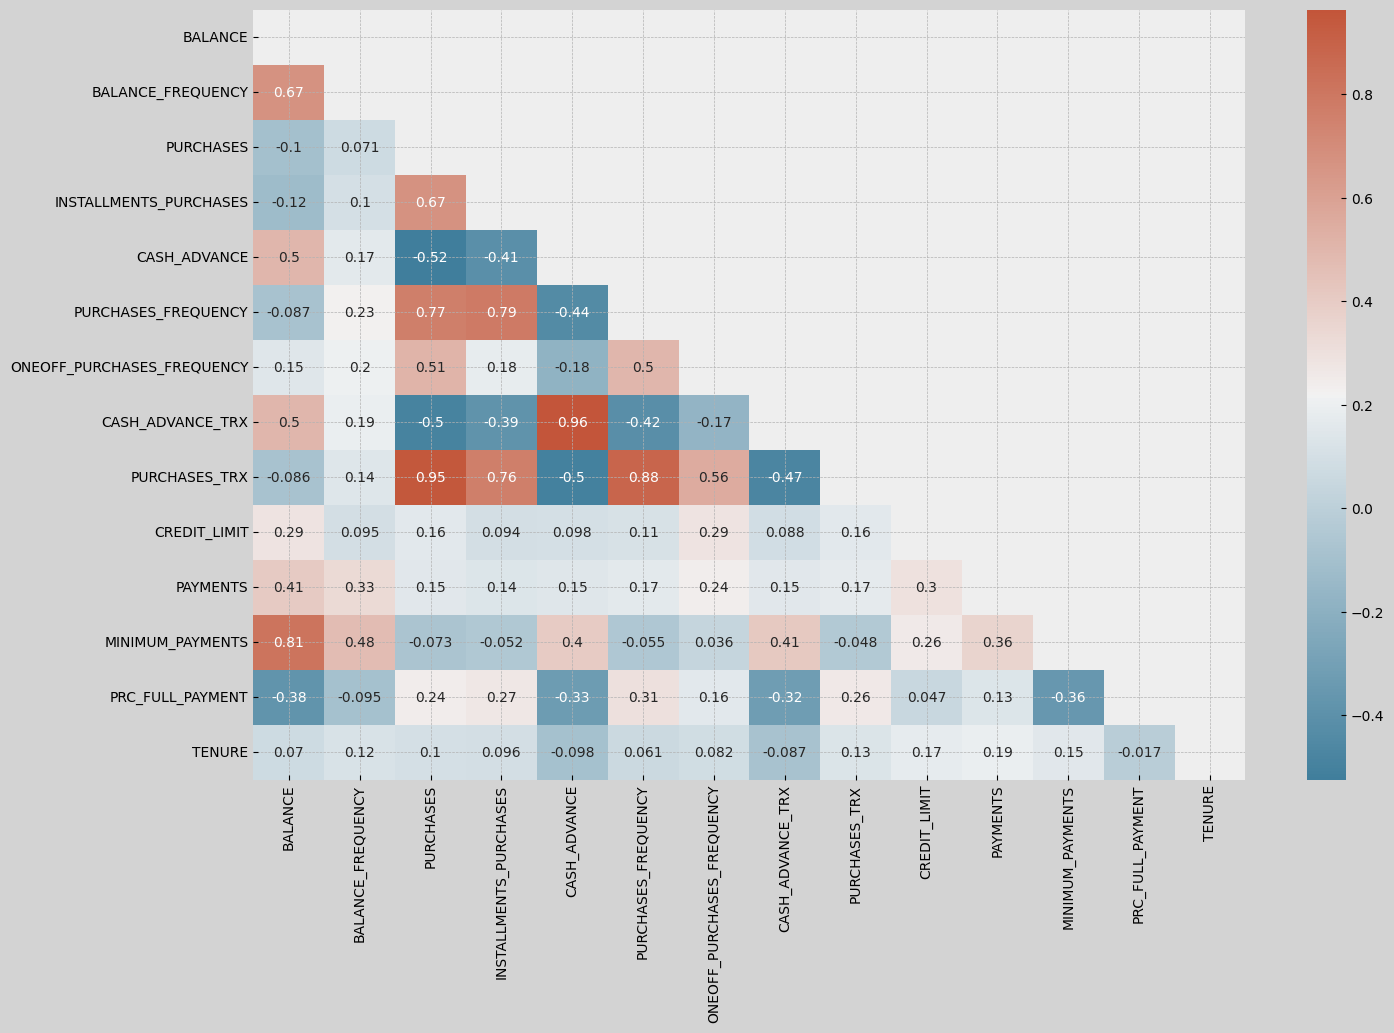

In [ ]:
#correlation
corr = df.corr()

f, ax = plt.subplots(figsize=(16, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

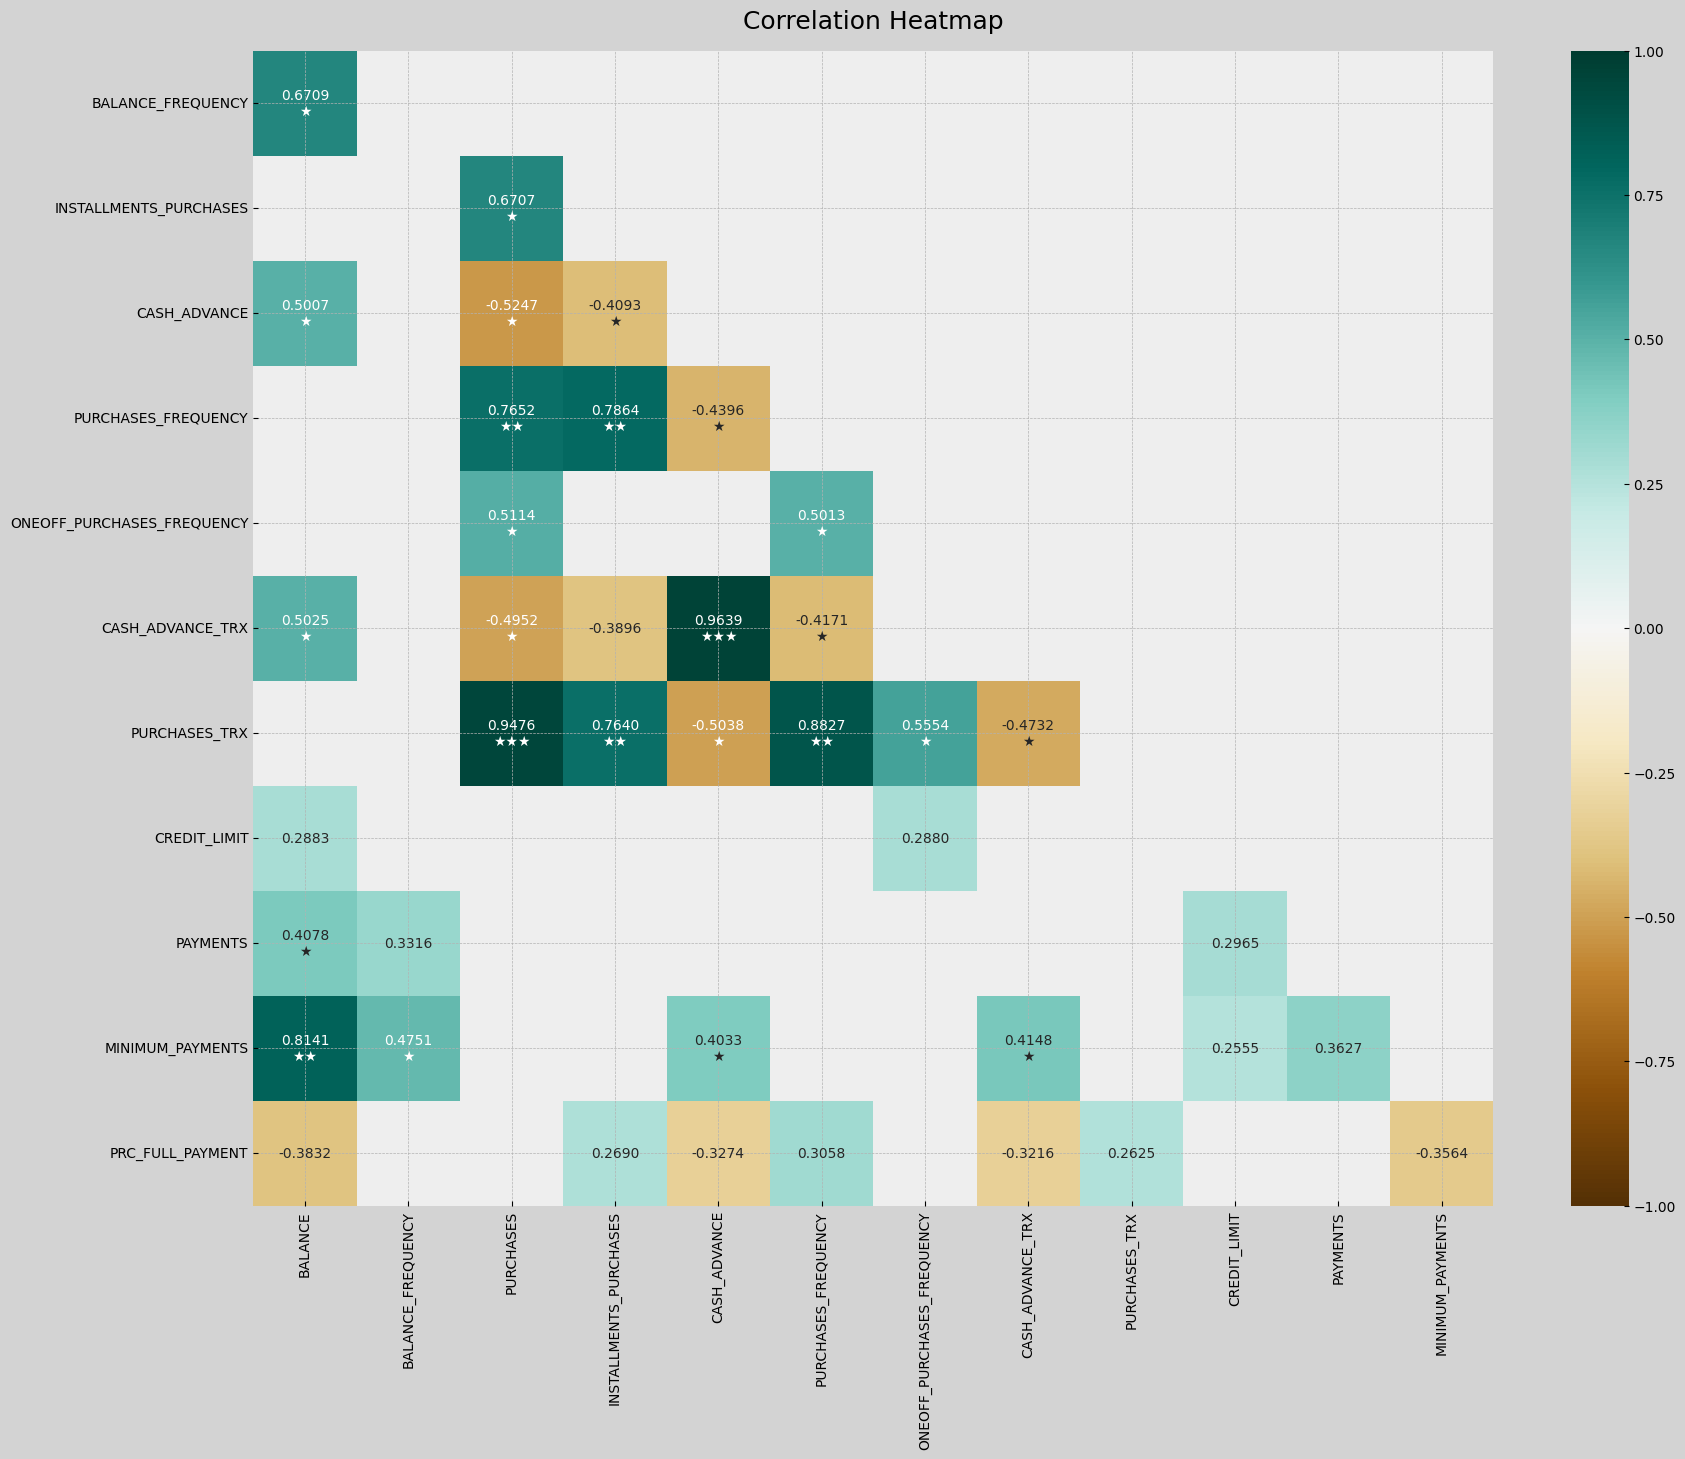

In [ ]:
corr = df.corr()

f, ax = plt.subplots(figsize=(20, 15))

mask = np.triu(np.ones_like(corr, dtype=bool)) #使用np.triu创建一个掩码来隐藏热图的上三角部分，因为相关性矩阵是对称的，上三角和下三角包含相同的信息。

cut_off = 0.25  # only show cells with abs(correlation) at least this value
extreme_1 = 0.4# show with a star
extreme_2 = 0.75  # show with a second star
extreme_3 = 0.9  # show with a third star
mask |= np.abs(corr) < cut_off # 更新了掩码，以便隐藏绝对值小于cut_off的相关性值，这意味着只有那些绝对值大于或等于cut_off的相关性值才会显示在热图上。
corr = corr[~mask]  # fill in NaN in the non-desired cells 填充掩码覆盖的单元格为NaN，实际上隐藏了这些单元格的值。

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
plt.show()

In [ ]:
df.dropna(inplace=True)

# **Data dimensionality reduction (t-SNE)**

In [ ]:
Dataset=df.copy()

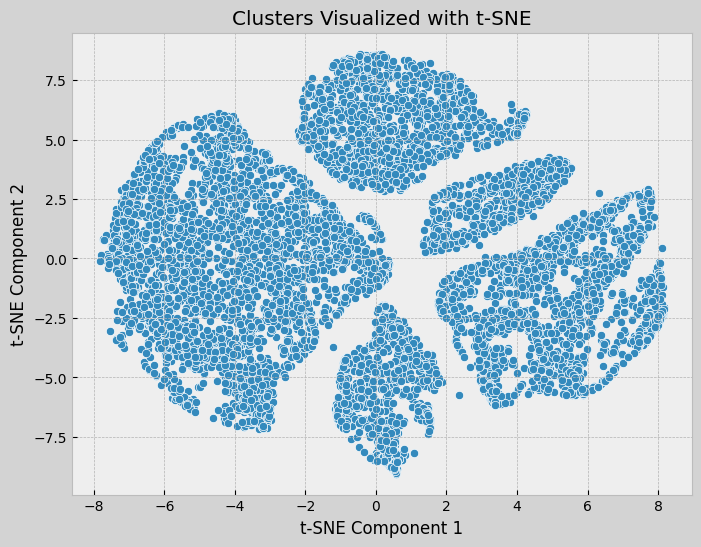

In [ ]:
# Apply t-SNE to reduce dimensions to 2 for visualization
from sklearn.manifold import TSNE
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(Dataset)

# Add the cluster information to the reduced data
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

# **K-Means**

In [ ]:
# Number of clusters (K)
n_clusters = 5

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters )

# Fit the model to the scaled data
kmeans.fit(Dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5)

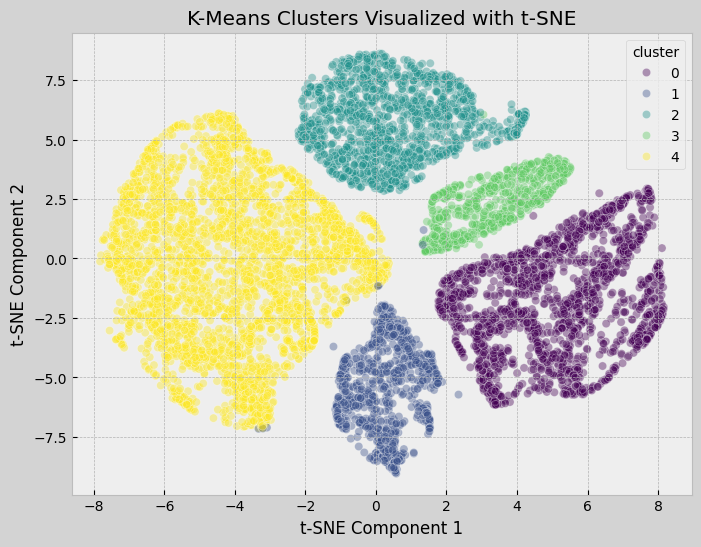

In [ ]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = kmeans.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.4 )
plt.title('K-Means Clusters Visualized with t-SNE')
plt.show()

# **GaussianMixture**

In [ ]:
def plot1 (model):
    labels = model.fit_predict(scaled_features)
    plt.scatter(scaled_features[:, 0], scaled_features[:, 12], c=labels, s=40, cmap='viridis')

In [ ]:
def plot2 (Data) :
    plt.style.use("default")
    custom_colors = ["skyblue", "yellowgreen" , 'red' , 'purple' , 'green']
    fig, ax = plt.subplots(1, 2, figsize=(12,6),facecolor='gray')
    ax[0].set_facecolor('purple')

    sns.countplot(x='cluster', data=Data , ax=ax[0], palette=custom_colors)
    for p in ax[0].patches:
        ax[0].annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10),
                   textcoords = 'offset points')
    ax[0].grid(True)
    ax[0].set_title('Count Plot of Clusters')

    cluster_counts = Data ['cluster'].value_counts()
    ax[1].pie(cluster_counts, labels = cluster_counts.index, autopct='%1.1f%%', startangle=90,
         colors=custom_colors)
    ax[1].set_title('Percentage of Clusters')

    plt.tight_layout()
    plt.show()

In [ ]:
def plot3 (data):
    columns_to_plot = ['BALANCE','PURCHASES','CASH_ADVANCE', 'CREDIT_LIMIT' ,
                   'PAYMENTS', 'MINIMUM_PAYMENTS', 'cluster']
    plt.rcParams['figure.facecolor'] = 'lightgrey'
    plt.style.use("bmh")
    sns.pairplot(data [columns_to_plot],  hue='cluster', corner=True)

In [ ]:
scaler = StandardScaler ()              # scalling the features
scaled_features = scaler.fit_transform (df)

In [ ]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
for k in range(2,11):
    GMM = GaussianMixture (n_components = k , random_state = 1)
    GMM.fit (scaled_features)

    score = silhouette_score (scaled_features , GMM.predict(scaled_features))
    silhouette.append (score)

    score1 = calinski_harabasz_score (scaled_features, GMM.predict(scaled_features))
    calinski_harabasz.append(score1)

    score2 = davies_bouldin_score (scaled_features, GMM.predict(scaled_features))
    davies_bouldin.append (score2)

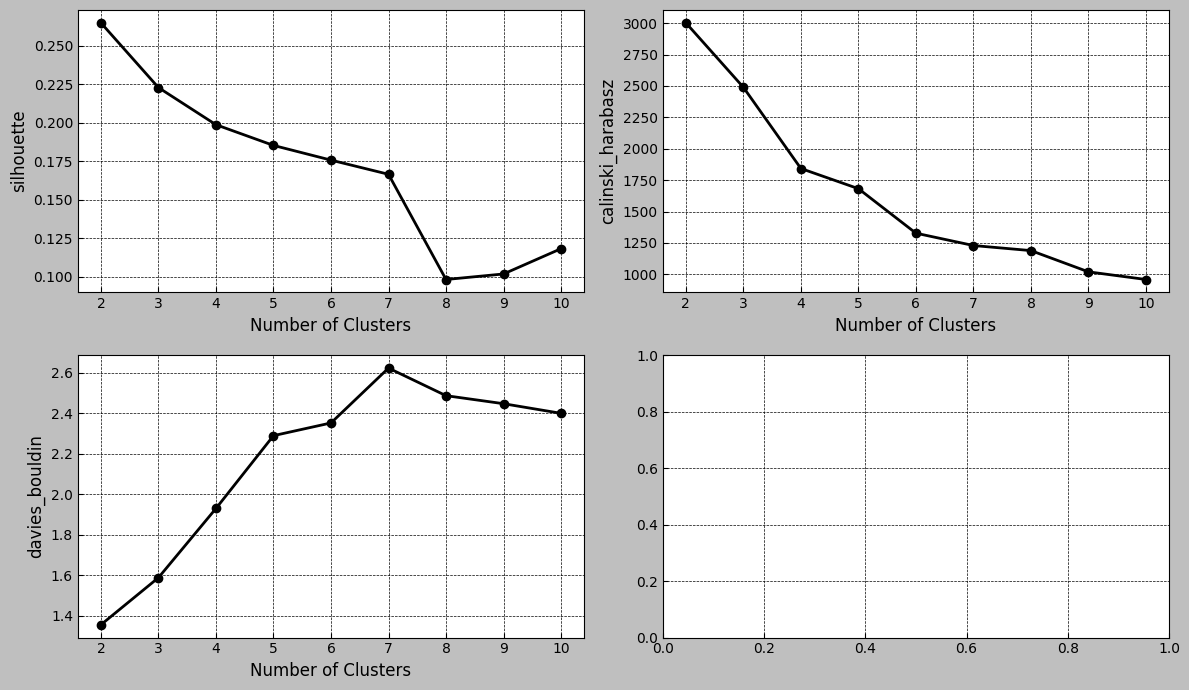

In [ ]:
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin}
metrics_list = list(metrics.items())

for i in range(2):
    for j in range(2):
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j]
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

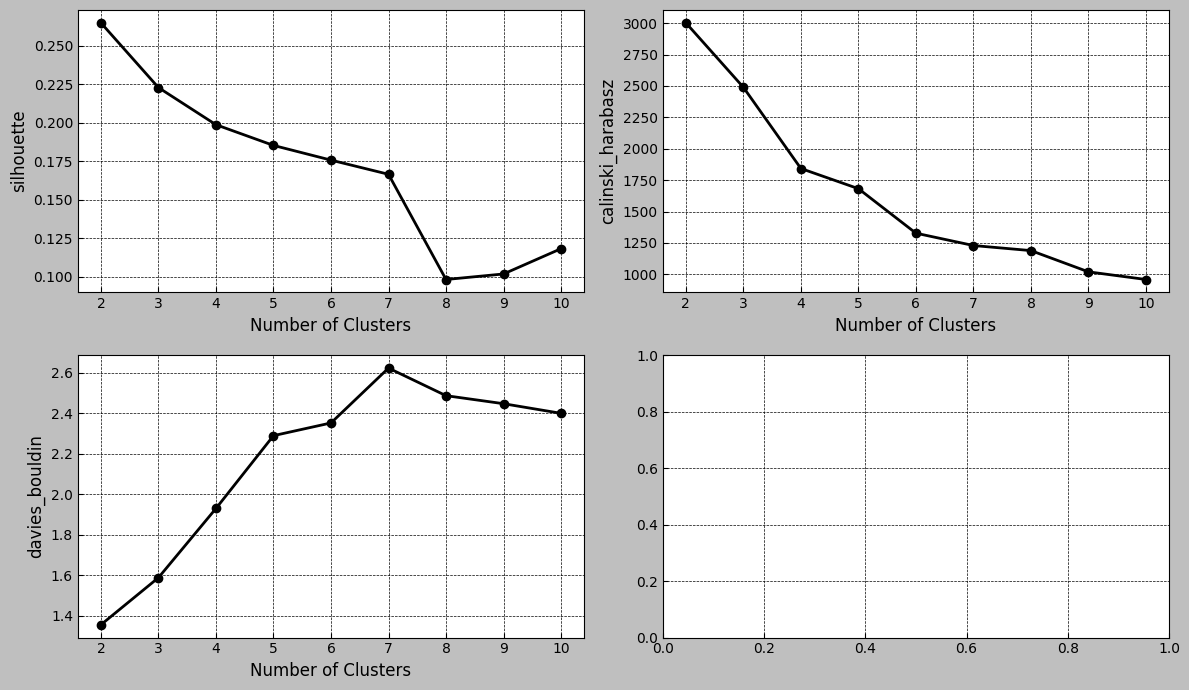

In [ ]:
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin}
metrics_list = list(metrics.items())

for i in range(2):
    for j in range(2):
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j]
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
GMM = GaussianMixture (n_components = 2 , random_state = 1)
GMM.fit (scaled_features)
score = silhouette_score (scaled_features , GMM.predict(scaled_features))
score

0.2650544565926837

In [ ]:
silhouette = []
max_iter_values = range(90, 110, 1)
for i in max_iter_values:
    GMM = GaussianMixture(n_components = 2, random_state = 1, max_iter = i)
    GMM.fit(scaled_features)
    score = silhouette_score(scaled_features, GMM.predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_max_iter = pd.DataFrame(max_iter_values, columns=['max_iter'])
result = pd.concat([df_max_iter, df_silhouette], axis=1)
result

,max_iter,silhouette_score
0,90,0.265054
1,91,0.265054
2,92,0.265054
3,93,0.265054
4,94,0.265054
5,95,0.265054
6,96,0.265054
7,97,0.265054
8,98,0.265054
9,99,0.265054


In [ ]:
result.max ()

max_iter            109.000000
silhouette_score      0.265054
dtype: float64

In [ ]:
silhouette = []
covariance_type_values = ['tied', 'diag', 'spherical', 'full']
for i in covariance_type_values:
    GMM = GaussianMixture(n_components = 2, random_state = 1, covariance_type = i)
    GMM.fit(scaled_features)
    score = silhouette_score(scaled_features, GMM.predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_covariance_type = pd.DataFrame(covariance_type_values, columns=['covariance_types'])
result = pd.concat([df_covariance_type, df_silhouette], axis=1)
result

,covariance_types,silhouette_score
0,tied,0.260013
1,diag,0.263672
2,spherical,0.228863
3,full,0.265054


In [ ]:
silhouette = []
n_init_values = range(1, 11, 1)
for i in n_init_values:
    GMM = GaussianMixture(n_components = 2, random_state = 1 , covariance_type = 'spherical' , n_init = i)
    GMM.fit(scaled_features)
    score = silhouette_score(scaled_features, GMM.predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_n_init = pd.DataFrame(n_init_values, columns=['n_init'])
result = pd.concat([df_n_init, df_silhouette], axis=1)
result

,n_init,silhouette_score
0,1,0.228863
1,2,0.228863
2,3,0.228863
3,4,0.228863
4,5,0.228863
5,6,0.228863
6,7,0.228863
7,8,0.228863
8,9,0.228863
9,10,0.228863


In [ ]:
silhouette = []
init_params_values = ['kmeans' , 'random']
for i in init_params_values:
    GMM = GaussianMixture(n_components = 2, random_state = 1 , covariance_type = 'spherical' ,
                          init_params = i)
    GMM.fit(scaled_features)
    score = silhouette_score(scaled_features, GMM.predict(scaled_features))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_init_params = pd.DataFrame(init_params_values, columns=['init_params'])
result = pd.concat([df_init_params, df_silhouette], axis=1)
result

,init_params,silhouette_score
0,kmeans,0.228863
1,random,0.229758


In [ ]:
# all scores for covariance_type = spherical
GMM = GaussianMixture (n_components = 2 , random_state = 1 , covariance_type = 'spherical')
GMM.fit (scaled_features)

print ('silhouette_score : ' , silhouette_score (scaled_features , GMM.predict(scaled_features)))
print ('calinski_harabasz_score : ' , calinski_harabasz_score (scaled_features, GMM.predict(scaled_features)))
print ('davies_bouldin_score : ' , davies_bouldin_score (scaled_features, GMM.predict(scaled_features)))

silhouette_score :  0.22886337278983593
calinski_harabasz_score :  2398.7840855203704
davies_bouldin_score :  1.2681422350973064


In [ ]:
# all scores for covariance_type = default
GMM = GaussianMixture (n_components = 2 , random_state = 1 )
GMM.fit (scaled_features)

print ('silhouette_score : ' , silhouette_score (scaled_features , GMM.predict(scaled_features)))
print ('calinski_harabasz_score : ' , calinski_harabasz_score (scaled_features, GMM.predict(scaled_features)))
print ('davies_bouldin_score : ' , davies_bouldin_score (scaled_features, GMM.predict(scaled_features)))

silhouette_score :  0.2650544565926837
calinski_harabasz_score :  3003.035048097604
davies_bouldin_score :  1.356723791397259


In [ ]:
gmmV = df.copy ()
GMM = GaussianMixture (n_components = 2 , random_state = 1 )
GMM.fit (scaled_features)
gmmV ['cluster'] = GMM.predict(scaled_features)

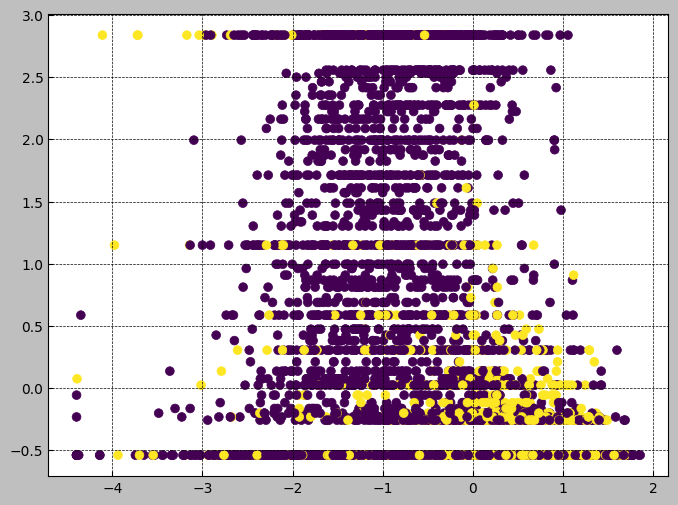

In [ ]:
plot1 (GMM)

<ipython-input-114-a9bf89396ddf>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-114-a9bf89396ddf>:7: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



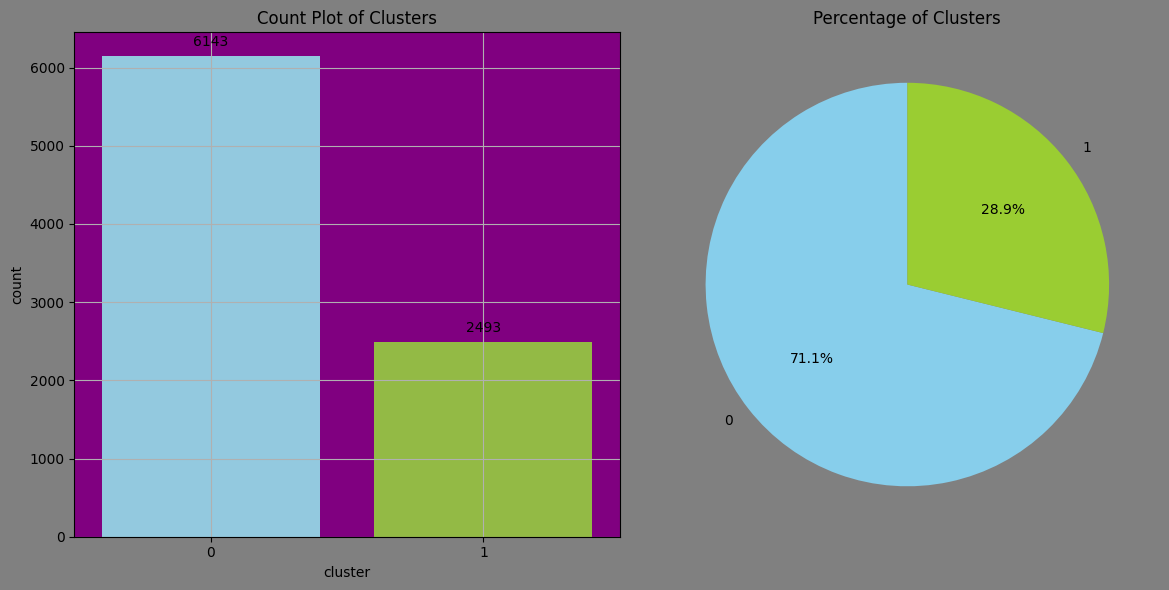

In [ ]:
plot2 (gmmV)

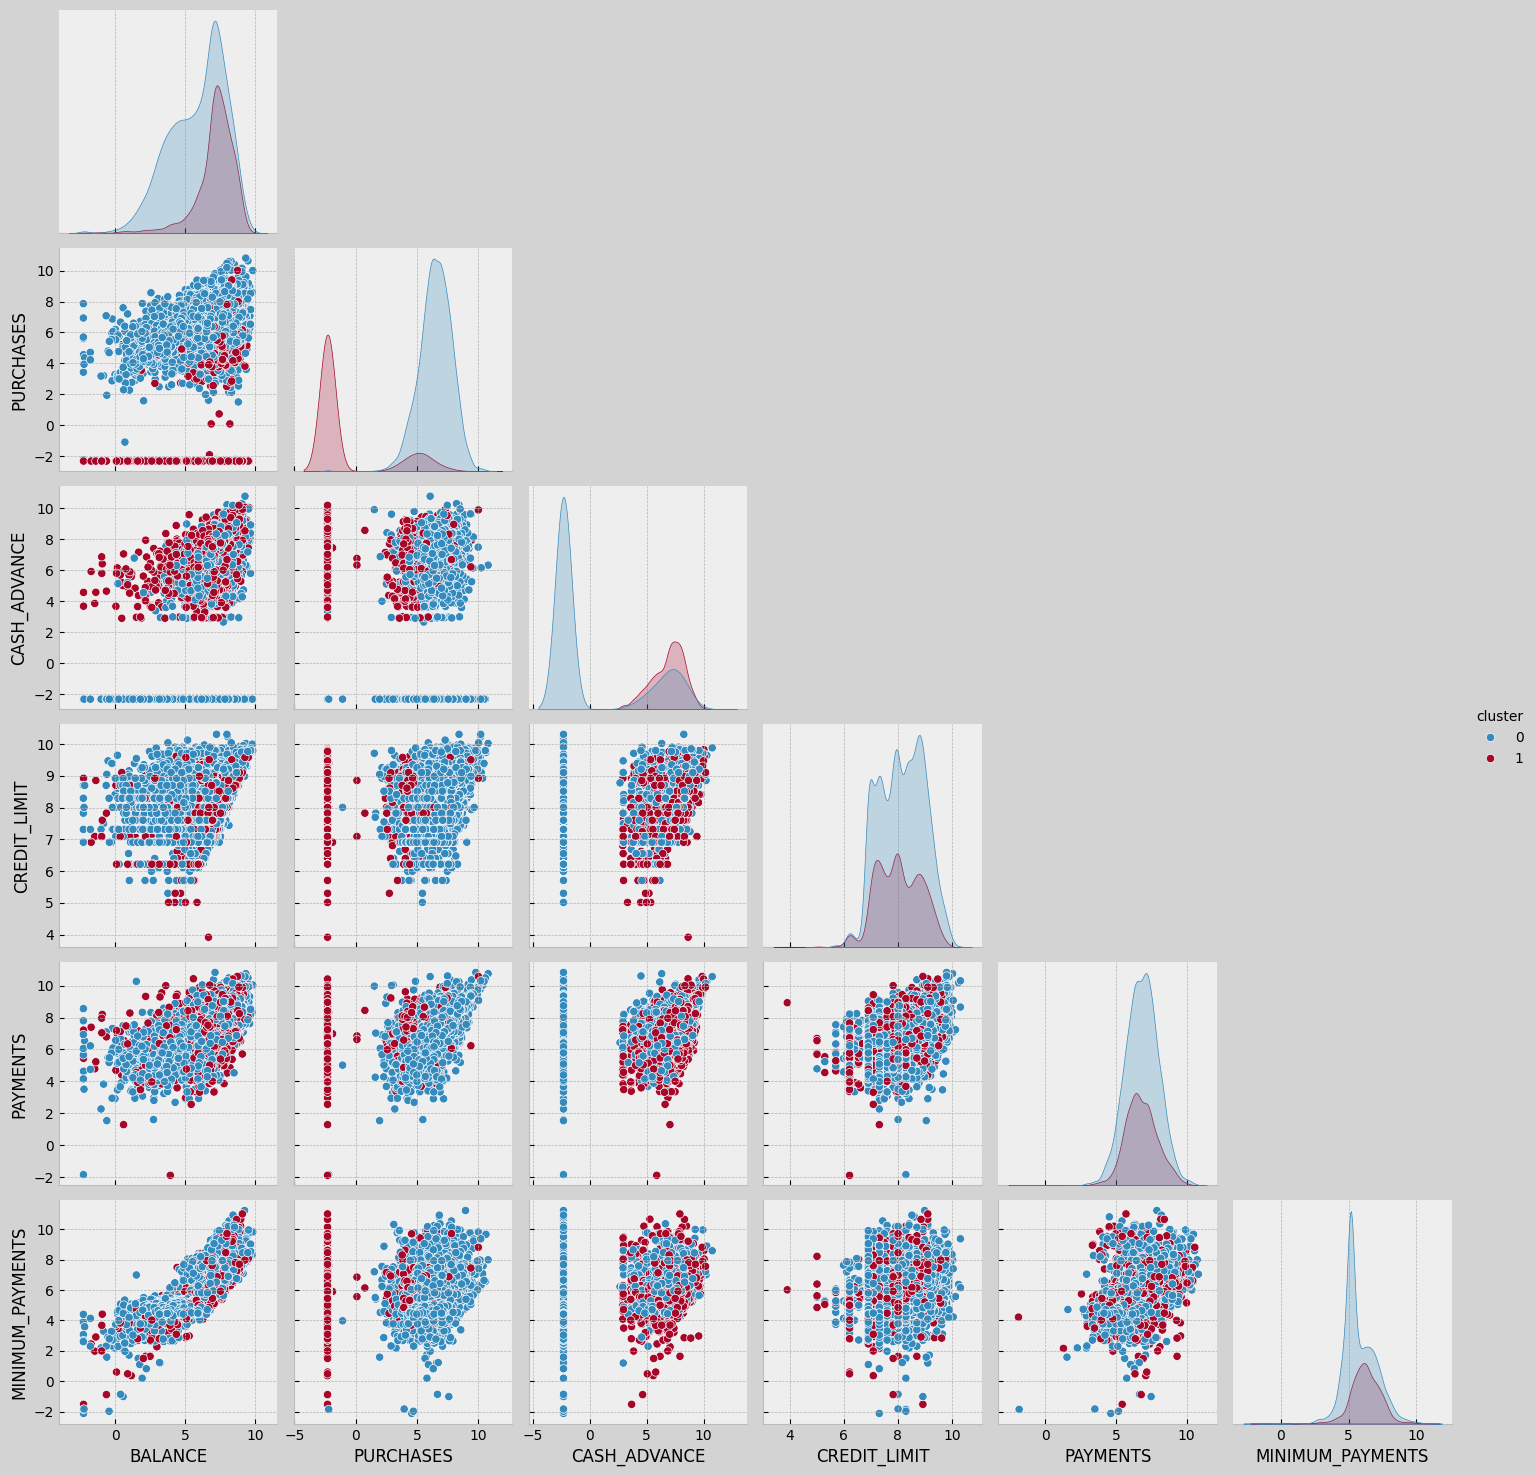

In [ ]:
plot3 (gmmV)

# **Affinity Propagation**

In [ ]:
scaler = StandardScaler ()              # scalling the features
scaled_features = scaler.fit_transform (df)
AP = AffinityPropagation (random_state = 42)
AP.fit (scaled_features)
labels = AP.labels_

In [ ]:
labels

array([138,  27, 135, ..., 227, 228, 208])

In [ ]:
set (labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
len (set (labels))

229

In [ ]:
AP = AffinityPropagation (random_state = 42 , damping = .9)
AP.fit (scaled_features)
labels2 = AP.labels_

In [ ]:
len (set (labels2))

224

In [ ]:
print ('silhouette_score : ' , silhouette_score (scaled_features , AP.predict(scaled_features)))
print ('calinski_harabasz_score : ' , calinski_harabasz_score (scaled_features, AP.predict(scaled_features)))
print ('davies_bouldin_score : ' , davies_bouldin_score (scaled_features, AP.predict(scaled_features)))

silhouette_score :  0.14239477166385434
calinski_harabasz_score :  330.3377685949091
davies_bouldin_score :  1.5079111728084265


# **Business meaning of each cluster**
## **Cluster 0**
### Customer Behavior Overview:
Customers in Cluster 0 demonstrate a preference for making purchases in installments rather than opting for cash advances.
### Purchase Behavior:


1.   The mean amount of purchases made in installments is $761.84, indicating a

significant portion of their spending occurs through installment payments.
2.   These customers tend to make a high number of purchase transactions, with a mean of approximately 23 transactions.

3.   Around 76% of customers in this cluster exhibit frequent purchase behavior,

indicating a consistent spending pattern.
4.   The mean amount of total purchases is $1528, suggesting that while purchases are frequent, they are moderate in size.
## **Cluster 1**
### Customer Behavior Overview:
Customers in Cluster 1 exhibit a preference for making one-off purchases rather than opting for installment payments.
### Purchase Behavior:



1.   The majority of purchases made by customers in this cluster are one-off transactions, indicating a tendency towards lump-sum spending.
2.   Customers in this cluster generally avoid purchases in installments, suggesting a preference for immediate payment rather than spreading payments over time.

3.   The number of purchase transactions is relatively lower compared to other clusters, with a mean of approximately 8 transactions.
4.   Around 36% of customers in this cluster demonstrate frequent purchase behavior, indicating a moderate level of spending activity.

5.   The mean amount of total purchases is $903, reflecting the tendency for one-off purchases with a moderate spending amount.
## **Cluster 2 :**
### Customer Behavior Overview:
Customers in Cluster 2 demonstrate a preference for using cash advances rather than making purchases in installments.
### Purchase Behavior:

1.   The majority of purchases made by customers in this cluster are through cash advances, indicating a reliance on immediate funds rather than installment payments.
2.   None of the customers in this cluster demonstrate frequent purchase behavior, suggesting a preference for infrequent or one-time spending.
### Cash Advance:
The mean amount of cash advances taken by customers in this cluster is $2011. This suggests that, on average, customers in Cluster 2 rely on relatively large cash advances to meet their immediate financial needs. It indicates a pattern of substantial cash flow requirements or perhaps unexpected expenses among this group of customers.
## **Cluster 3**
### Customer Behavior Overview:
Customers in Cluster 3 demonstrate a preference for making purchases both in installments and through cash advances.
### Purchase Behavior:

1.   The mean amount of purchases made in installments is $701.84, indicating a significant portion of their spending occurs through installment payments.
2.   These customers tend to make a high number of purchase transactions, with a mean of approximately 25 transactions.

3.   Around 74% of customers in this cluster exhibit frequent purchase behavior, indicating a consistent spending pattern.
4.   The mean amount of total purchases is $1501, suggesting that while purchases are frequent, they are moderate in size.
### Cash Advance:
The mean amount of cash advances taken by customers in this cluster is 2080.54, suggesting a reliance on immediate funds for their purchases.
## **Cluster 4**
### Customer Behavior Overview:
Customers in Cluster 4 demonstrate a preference for using cash advances rather than making purchases in installments.
### Purchase Behavior:

1.   The mean amount of purchases made by customers in this cluster is 669, indicating a moderate level of spending on purchases.
2.   Customers in this cluster tend to make fewer purchase transactions, with a mean of approximately 6 transactions.
3.   Around 27% of customers in this cluster exhibit frequent purchase behavior, suggesting a preference for infrequent spending or one-time purchases.
### Cash Advance:
The mean amount of cash advances taken by customers in this cluster is $2046.54. This suggests that customers in Cluster 4 rely heavily on cash advances to meet their financial needs, indicating potential financial instability or unexpected expenses among this group of customers.